In [1]:
from becquerel import Spectrum
from becquerel.tools import Isotope, IsotopeQuantity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
spec = Spectrum.from_file('examples/UCB087_Wild_King_Salmon_3.Spe')

SpeFile: Reading file examples/UCB087_Wild_King_Salmon_3.Spe


C:\Users\joann\AppData\Roaming\Python\Python35\site-packages\becquerel-0.1.0-py3.5.egg\becquerel\parsers\spe_file.py:148: SpectrumFileParsingWarning: SpeFile has $PRESETS field, skipping 3 lines
  SpectrumFileParsingWarning)


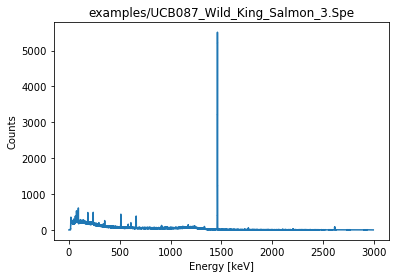

In [6]:
spec.plot()

In [4]:
# Specific info for calculating efficiency: Co_60 as an example
# isotope = 'co60'
# date = '2008-01-15'
# uci = 9.38
# live_time = spec.livetime
# current_activity = IsotopeQuantity(isotope, date, uci).bq_now()

NNDCRequestError: Request failed: Internal Server Error

In [46]:
# Calculate net counts from deltaE estimation: sum of two deltaE counts
# Specific deltaE range defined by user or default: K-40, Cs-137, etc
# Use deltaE on both side to interpolate background on the middle region
# Subtraction for actual peak counts 
# Efficiency calculation
delta_E = 10 #keV
target_peak = 1461 #keV
idx = (spec.energies_kev > target_peak-2.0*delta_E)*(spec.energies_kev < target_peak-1.0*delta_E)
prev_bins = np.where(idx)
idx = (spec.energies_kev > target_peak-0.5*delta_E)*(spec.energies_kev < target_peak+0.5*delta_E)
curr_bins = np.where(idx)
idx = (spec.energies_kev > target_peak+1.0*delta_E)*(spec.energies_kev < target_peak+2.0*delta_E)
post_bins = np.where(idx)
prev_bins[0][0]
counts_1 = np.sum(spec.counts_vals[prev_bins[0][0]:prev_bins[0][-1]])
counts_2 = np.sum(spec.counts_vals[post_bins[0][0]:post_bins[0][-1]])
counts_target = np.sum(spec.counts_vals[curr_bins[0][0]:curr_bins[0][-1]])
background = (counts_1 + counts_2)/2
net_counts = counts_target - background
#eff = (net_counts/live_time)/(current_activity)

In [47]:
len(prev_bins[0])

54

In [48]:
len(curr_bins[0])

54

In [49]:
len(post_bins[0])

55

In [50]:
counts_target

60901.0

In [51]:
net_counts

60244.0

In [52]:
bg = Spectrum.from_file('examples/UCB096_Backgorund_2_13_17.Spe')

SpeFile: Reading file examples/UCB096_Backgorund_2_13_17.Spe


C:\Users\joann\AppData\Roaming\Python\Python35\site-packages\becquerel-0.1.0-py3.5.egg\becquerel\parsers\spe_file.py:148: SpectrumFileParsingWarning: SpeFile has $PRESETS field, skipping 3 lines
  SpectrumFileParsingWarning)


In [53]:
bgsub = spec - bg
delta_E = 10 #keV
target_peak = 1461 #keV
idx = (bgsub.energies_kev > target_peak-2.0*delta_E)*(bgsub.energies_kev < target_peak-1.0*delta_E)
prev_bins = np.where(idx)
idx = (bgsub.energies_kev > target_peak-0.5*delta_E)*(bgsub.energies_kev < target_peak+0.5*delta_E)
curr_bins = np.where(idx)
idx = (bgsub.energies_kev > target_peak+1.0*delta_E)*(bgsub.energies_kev < target_peak+2.0*delta_E)
post_bins = np.where(idx)
prev_bins[0][0]
counts_1 = np.sum(bgsub.cps_vals[prev_bins[0][0]:prev_bins[0][-1]]) * spec.livetime
counts_2 = np.sum(bgsub.cps_vals[post_bins[0][0]:post_bins[0][-1]]) * spec.livetime
counts_target = np.sum(bgsub.cps_vals[curr_bins[0][0]:curr_bins[0][-1]]) * spec.livetime
background = (counts_1 + counts_2)/2
net_counts = counts_target - background

C:\Users\joann\AppData\Roaming\Python\Python35\site-packages\becquerel-0.1.0-py3.5.egg\becquerel\core\spectrum.py:533: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)


In [54]:
net_counts

58329.0